### Problem Statement :

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

### Business Goal :

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline

In [3]:
# Importing dataset

data = pd.read_csv(r'C:\Users\Mohit Pathak\Documents\UPGRAD\Clustering\Assignment Clustering\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### DATASET INSPECTION

In [4]:
# DATA INFORMATION
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# DATASET SHAPE
data.shape


(9240, 37)

In [6]:
#DATASET MISSING VALUE COLUMNS
data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
#DATASET DESCRIPTION
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data Validations

#### Data Value Count Check

In [8]:
# Checking the value_counts in every variables to understand the data better

#Create a copy of ca dataframe, without the first two unique value columns, 
#as this will have unique values, and donot make sense to do a value count on it.

data_dummy=data.iloc[:,2:]


for col in data_dummy:
    print(data_dummy[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

0    5679
1    3561
Name: Converted, dtype: int64 

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5

### INSIGHT: 
From the above value_counts, we could see that the below variables has highly IMBALANCED data. So these will not significantly contribute to our model results. Hence we will tag them to be dropped. - Magazine - Newspaper Article - X Education Forums - Newspaper - Digital Advertisement - Through Recommendations - Receive More Updates About Our Courses - Update me on Supply Chain Content - Get updates on DM Content - I agree to pay the amount through cheque - What matters most to you in choosing a course - Search - Do Not Call - Do Not Email - Country - What is your current occupation

In [9]:
drop_list = ['Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
                'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
                'Update me on Supply Chain Content', 'Get updates on DM Content',
                'I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email','Search', 
                'What matters most to you in choosing a course','Country','What is your current occupation']

drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation']

## Duplicates Check

### Checking the 'Prospect ID' & 'Lead Number' variables

In [10]:
# Checking if this is a unique ID with no duplicates

data.duplicated(subset = 'Prospect ID').sum()

0

In [11]:
# Checking if this is a unique ID with no duplicates

data.duplicated(subset = 'Lead Number').sum()

0

INSIGHT: 'Prospect ID','Lead Number' seems to be purely unique ID's, and will not make any significant contributions to our model results. Hence we will add them to the 'to_drop_list'.

In [12]:
#Adding the variables to to_drop_list

drop_list.append('Prospect ID')
drop_list.append('Lead Number')
drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

### Exploratory Data Analysis

### Data Imbalance Percentage Check

In [13]:
data.Converted.isnull().sum()

0

In [14]:
# Calculating % of of Non Converted and Converted Leads in the Dataset

round(100*(data['Converted'].value_counts()/len(data.index)),2)

0    61.46
1    38.54
Name: Converted, dtype: float64

Text(0, 0.5, '% of Conversion')

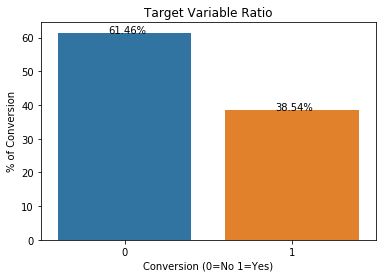

In [15]:
# Plot representing the Imbalance Percentage in lead DataFrame

ax = sns.barplot(x="Converted", y="Converted",
                 data=data, estimator=lambda x: len(x) / len(data) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))

#round(data['Converted'].value_counts(normalize=True),3).sort_values(ascending = False).plot(kind='bar')
plt.title('Target Variable Ratio')
plt.xlabel('Conversion (0=No 1=Yes)')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')

### INSIGHT: 
Our Target variable is having a 62:38 ratio, and seems to be properly balanced with respect to the conversion ratio



### Data Cleaning and Conditioning

#### Handling 'Select' values in the data:

During initial analysis (value_counts) , we could see that there are many variables having 'Select' as the categorical values. These are values that customer has clearly missed to add, so we will consider them as NULL values. We will convert all 'Select' to 'NaN'

In [16]:
data = data.replace('Select', np.nan)

Checking unique value counts of City, Specialization and How did you hear about X Education columns after removing 'Select' values

In [17]:
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [18]:
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [19]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
data['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

Note: All the 'Select' values are now replaced

### Check the NULL Values¶

In [21]:
#checking null values in each columns

data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [22]:
#checking percentage of null values in each columns

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [23]:
#dropping cols with more than 40% missing values

cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 40):
        data.drop(i, 1, inplace = True)

In [24]:
#checking null values percentage

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### Exploring Categorical Variables

In [25]:
#Checking overall columns list to analyse

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [26]:
#Checking to drop list, as we donot want to analyse these columns

drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

### 'Lead Origin'

In [27]:
# Checking unique value counts 

data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

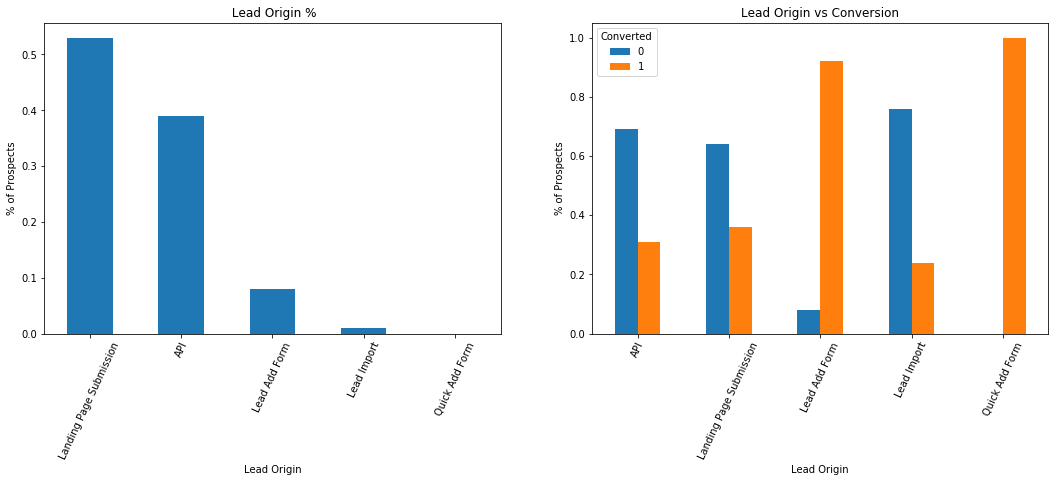

In [28]:
# Plotting w.r.t self as well as target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Lead Origin'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Origin %')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Lead Origin'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Origin vs Conversion')
plt.xlabel('Lead Origin')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [29]:
# Checking unique value counts 

round(data['Lead Origin'].value_counts(normalize=True),3)

Landing Page Submission    0.529
API                        0.387
Lead Add Form              0.078
Lead Import                0.006
Quick Add Form             0.000
Name: Lead Origin, dtype: float64

#### Checking Lead Origin Vs Conversion

In [30]:

print("#####################################")

print("Lead Origin v/s Conversion %")
print("#####################################")
print(round(100*(pd.crosstab(data['Lead Origin'],data.Converted).apply(lambda r: r/r.sum(),axis=1)),2))
            
print("#####################################")

#####################################
Lead Origin v/s Conversion %
#####################################
Converted                    0       1
Lead Origin                           
API                      68.85   31.15
Landing Page Submission  63.81   36.19
Lead Add Form             7.52   92.48
Lead Import              76.36   23.64
Quick Add Form            0.00  100.00
#####################################


INSIGHT: - Univariate Analysis states that ~53% of the Lead Origin is from 'Landing Page Submission' followed by ~39% from API - Bivariate Analysis states that 'Landing Page Submission' has 36% of Conversion and 'API' has 31% of Conversion. All calculations shown above.

###  'Last Activity' 

In [31]:
# Checking unique value counts 

data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


### Merging values that are less frequent from 'Last Activity' to 'Others' category

Looking at the proportions of various values in 'Last Activity' We could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'Last Activity' has 103 NULL values. We will impute the NULL values with the MODE imputation, in this case 'Email Opened'.

In [32]:
# Imputing Null with Others, as it is generally Unknown sources
data['Last Activity'] = data['Last Activity'].replace(np.nan, 'Email Opened')

# Merging low frequency items to Others
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

In [33]:
# Checking unique value counts 

data['Last Activity'].value_counts()

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Name: Last Activity, dtype: int64

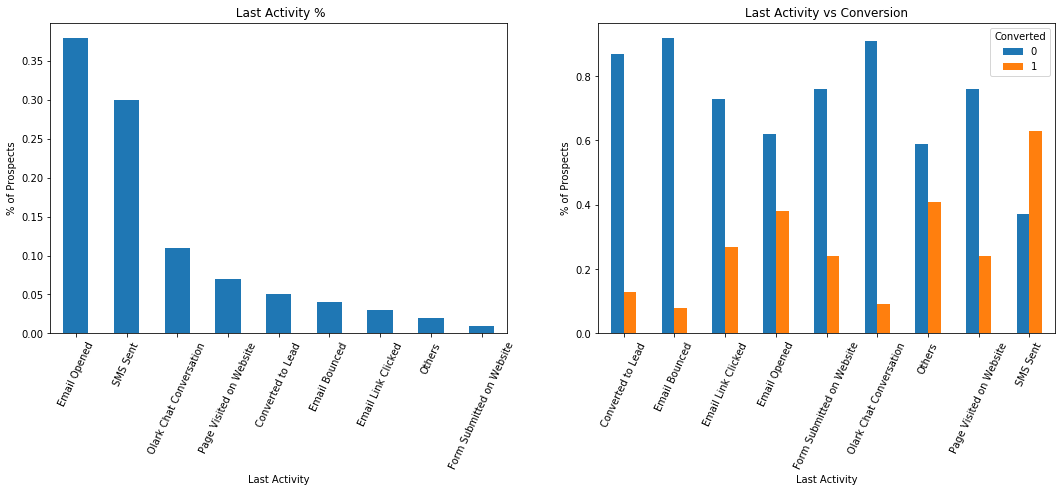

In [34]:
# Plotting analysis of variable with self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Last Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Last Activity %')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Last Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Activity vs Conversion')
plt.xlabel('Last Activity')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [35]:
# Checking unique value counts 

round(data['Last Activity'].value_counts(normalize=True),3).sort_values(ascending = False)

Email Opened                 0.383
SMS Sent                     0.297
Olark Chat Conversation      0.105
Page Visited on Website      0.069
Converted to Lead            0.046
Email Bounced                0.035
Email Link Clicked           0.029
Others                       0.022
Form Submitted on Website    0.013
Name: Last Activity, dtype: float64

In [36]:
print("####################################")

print("Last Activity v/s Conversion %")
print("####################################")
print(round(pd.crosstab(data['Last Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("####################################")

####################################
Last Activity v/s Conversion %
####################################
Converted                     0     1
Last Activity                        
Converted to Lead          0.87  0.13
Email Bounced              0.92  0.08
Email Link Clicked         0.73  0.27
Email Opened               0.62  0.38
Form Submitted on Website  0.76  0.24
Olark Chat Conversation    0.91  0.09
Others                     0.59  0.41
Page Visited on Website    0.76  0.24
SMS Sent                   0.37  0.63
####################################


##  'Lead Source'

In [37]:
# Checking unique value counts 

data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
Pay per Click Ads       1
NC_EDM                  1
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

### Merging less frequent values of 'Lead Source' to 'Others' category

Looking at the proportions of various values in 'Lead Source' We could see there are couple of low frequent values in there. We will merge them into a new category 'Others'
We will also merge 'google' to 'Google' as this seems like a typo error

Earlier from our Null value check, we noted that 'Lead Source' has 36 NULL values. We will impute the NULL values with the MODE imputation, in this case 'Google'.

In [38]:
# Merging 2 Google into one category
data['Lead Source'] = data['Lead Source'].replace('google', 'Google')


# Imputing Null with Others, as it is generally Unknown sources
data['Lead Source'] = data['Lead Source'].replace(np.nan, 'Google')

# Merging low frequency items to Others
data['Lead Source'] = data['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

In [39]:
# Checking unique value counts 

data['Lead Source'].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Others                78
Name: Lead Source, dtype: int64

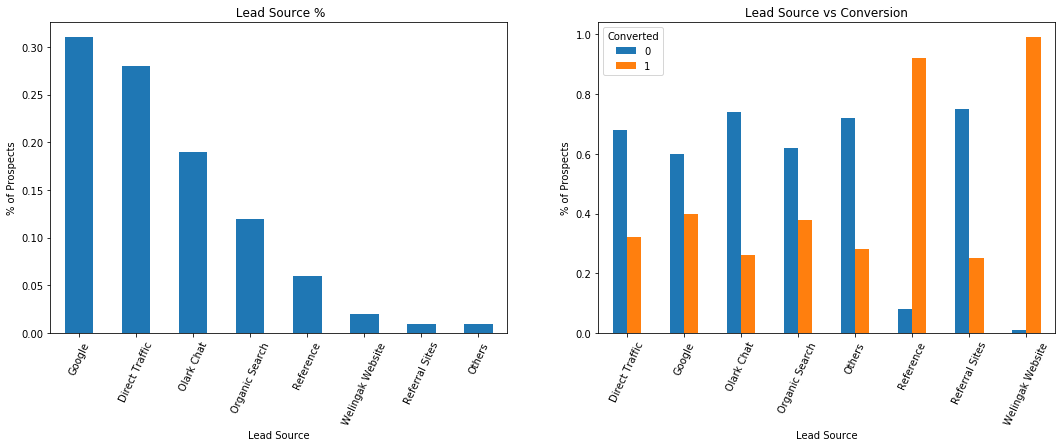

In [40]:
# Plotting vs self and target variable

plt.figure(figsize=(18, 12))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Lead Source'].value_counts(normalize=True),2).plot(kind='bar')
plt.title(' Lead Source %')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Lead Source'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Lead Source vs Conversion')
plt.xlabel('Lead Source')
plt.xticks(rotation=65)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [41]:
# Checking unique value counts 

round(data['Lead Source'].value_counts(normalize=True),3).sort_values(ascending = False)

Google              0.315
Direct Traffic      0.275
Olark Chat          0.190
Organic Search      0.125
Reference           0.058
Welingak Website    0.015
Referral Sites      0.014
Others              0.008
Name: Lead Source, dtype: float64

In [42]:
print("####################################")

print("Lead Source v/s Conversion %")
print("####################################")
print(round(pd.crosstab(data['Lead Source'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("####################################")

####################################
Lead Source v/s Conversion %
####################################
Converted            0     1
Lead Source                 
Direct Traffic    0.68  0.32
Google            0.60  0.40
Olark Chat        0.74  0.26
Organic Search    0.62  0.38
Others            0.72  0.28
Reference         0.08  0.92
Referral Sites    0.75  0.25
Welingak Website  0.01  0.99
####################################


### INSIGHT: 
Univariate Analysis states that ~31% of the Lead Source is from 'Google' followed by ~28% from 'Direct Traffic' - Bivariate Analysis states that 'Google' as a Lead Source has 40% of Conversion and 'Direct Traffic' has 32% of Conversion. All calculations shown above.

##  'Specialization'

In [43]:
# Checking unique value counts 

data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

### Merging less frequent values of 'Specialization' to 'Others' category
Looking at the proportions of various values in 'Specialization' We could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'Specialization' has 3380 NULL values. We will impute the NULL values as 'Others' as not selecting a Specialization could mean that he or she has not worked in any industry earlier. So we will categorise them into Others.

In [44]:
# Imputing Null with Others, as it is generally Unknown sources
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')

# Merging low frequency items to Others
data['Specialization'] = data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'], 'Others')

In [45]:
# Checking unique value counts 

data['Specialization'].value_counts()

Others                               3550
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Name: Specialization, dtype: int64

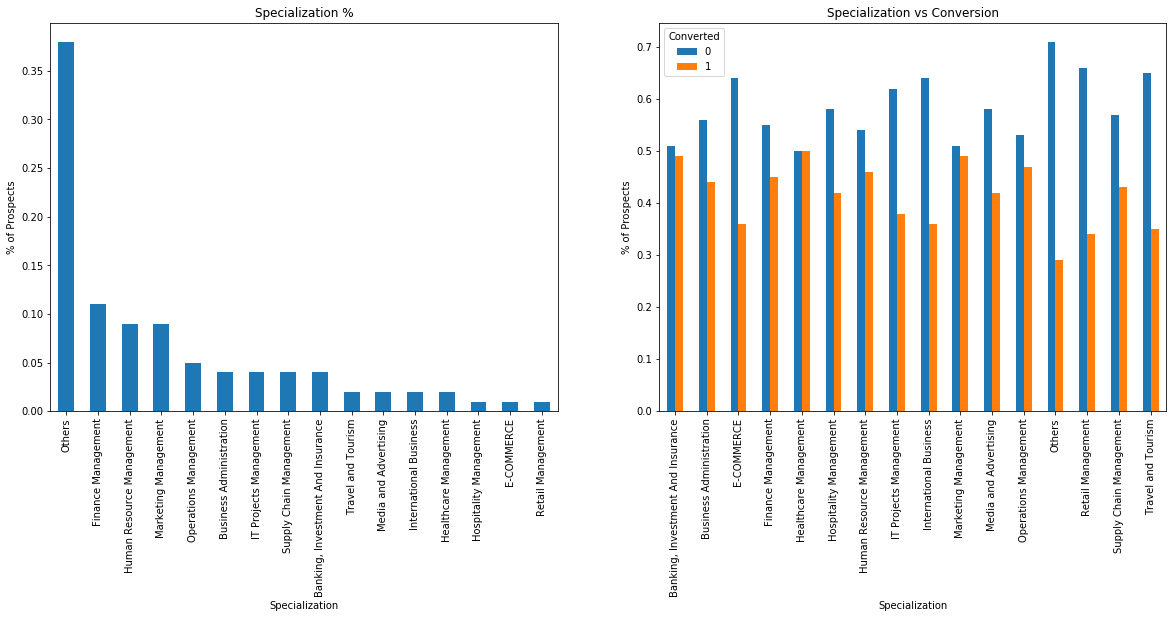

In [46]:
# Plotting Specialization w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Specialization'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Specialization %')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Specialization'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Specialization vs Conversion')
plt.xlabel('Specialization')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()


In [47]:
print("#######################################")

print("Specialization v/s Conversion %")
print("#######################################")
print(round(pd.crosstab(data['Specialization'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("#######################################")

#######################################
Specialization v/s Conversion %
#######################################
Converted                             0     1
Specialization                               
Banking, Investment And Insurance  0.51  0.49
Business Administration            0.56  0.44
E-COMMERCE                         0.64  0.36
Finance Management                 0.55  0.45
Healthcare Management              0.50  0.50
Hospitality Management             0.58  0.42
Human Resource Management          0.54  0.46
IT Projects Management             0.62  0.38
International Business             0.64  0.36
Marketing Management               0.51  0.49
Media and Advertising              0.58  0.42
Operations Management              0.53  0.47
Others                             0.71  0.29
Retail Management                  0.66  0.34
Supply Chain Management            0.57  0.43
Travel and Tourism                 0.65  0.35
#######################################


### INSIGHT: 
Univariate Analysis states that ~40% of the Specialization is from 'Others' category, followed by ~10% from 'Finance Management' - Bivariate Analysis states that 'Finance Management' as a Specialization has 45% of Conversion and 'Human Resource Management' has 46% of Conversion. All calculations shown above.

### Handling 'Tags' column

In [48]:
# Checking unique value counts 

data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

### Merging less frequent values of 'Tags' to 'Others' category
Looking at the proportions of various values in 'Tags' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'Tags' has 3353 NULL values. We will impute the NULL values with MODE, in this case as 'Unemployed'. As not selecting a 'What is your current occupation' could mean that he or she was Unemployed. So we will categorise them into Unemployed.

In [49]:
# Imputing Null with Others, as it is generally Unknown sources
data['Tags'] = data['Tags'].replace(np.nan, 'Others')

# Merging low frequency items to Others
data['Tags'] = data['Tags'].replace(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education', 'Interested  in full time MBA',
                                     'Graduation in progress', 'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given', 'opp hangup',
                                     'number not provided', 'in touch with EINS', 'Lost to Others', 'Want to take admission but has financial problems',
                                     'Still Thinking', 'Interested in Next batch', 'In confusion whether part time or DLP', 'Lateral student',
                                     'Shall take in the next coming month', 'University not recognized', 'Recognition issue (DEC approval)','Closed by Horizzon'
                                     ], 'Others')

In [50]:
# Checking unique value counts 

data['Tags'].value_counts()

Others                                 4987
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

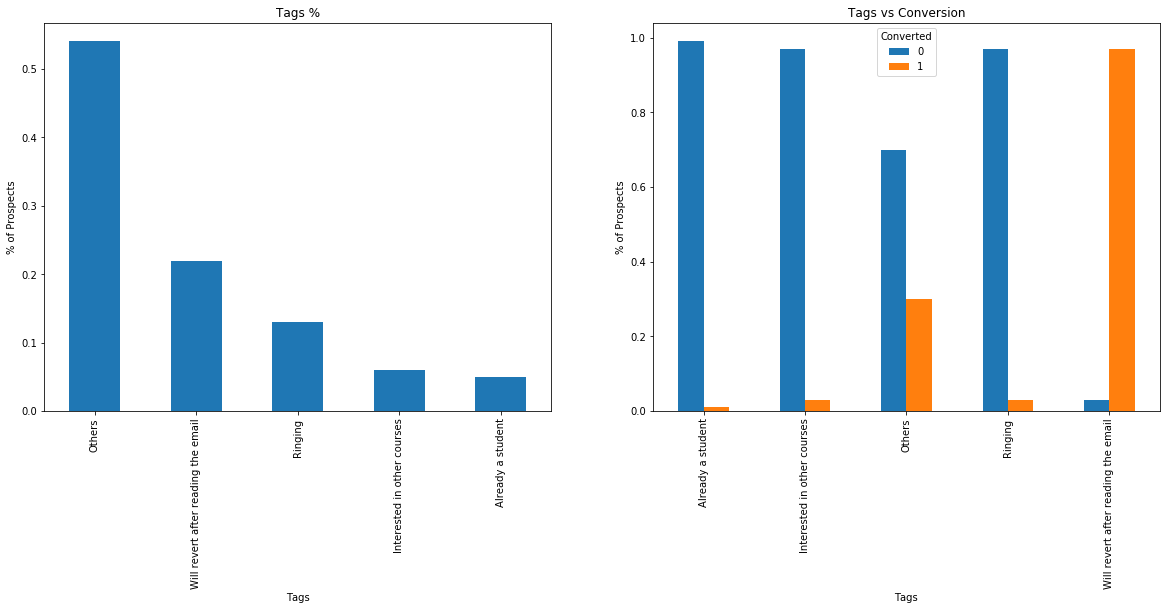

In [51]:
#Plotiing variable w.r.t self and w.r.t target

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Tags'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Tags %')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Tags'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Tags vs Conversion')
plt.xlabel('Tags')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

In [52]:
print("####################################")

print("Tags v/s Conversion %")
print("####################################")
print(round(pd.crosstab(data['Tags'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2))
            
print("####################################")

####################################
Tags v/s Conversion %
####################################
Converted                               0     1
Tags                                           
Already a student                    0.99  0.01
Interested in other courses          0.97  0.03
Others                               0.70  0.30
Ringing                              0.97  0.03
Will revert after reading the email  0.03  0.97
####################################


INSIGHT: - Univariate Analysis states that ~54% of the Tags is from 'Others' category, followed by ~22% from 'Will revert after reading the email' - Bivariate Analysis states that 'Will revert after reading the email' as a Tags has 97% of Conversion and 'Others' has 30% of Conversion. All calculations shown above.

###  'City'

In [53]:
# Checking unique value counts 

data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

#### Merging less frequent values of 'City' to 'Others' category
Looking at the proportions of various values in 'City' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

Earlier from our Null value check, we noted that 'City' has 3669 NULL values. We will also impute the NULL values with 'Others'.

In [54]:
# Imputing Null with Others, as it is generally Unknown sources
data['City'] = data['City'].replace(np.nan, 'Others')

# Merging low frequency items to Others
data['City'] = data['City'].replace(['Tier II Cities','Other Metro Cities','Other Cities of Maharashtra','Other Cities'], 'Others')

In [55]:
# Checking unique value counts 

data['City'].value_counts()

Others               5266
Mumbai               3222
Thane & Outskirts     752
Name: City, dtype: int64

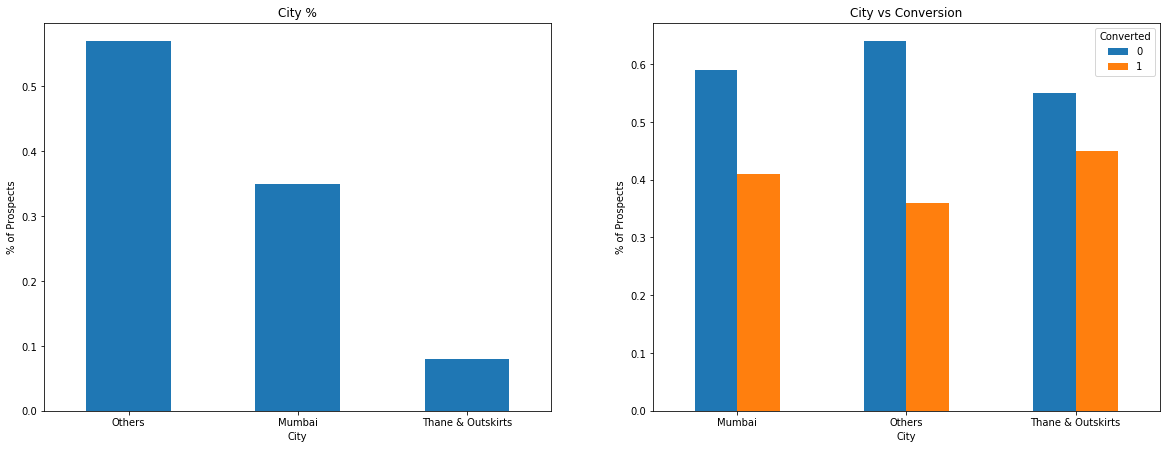

In [56]:
# Plotting w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['City'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('City %')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['City'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('City vs Conversion')
plt.xlabel('City')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

INSIGHT: - Univariate Analysis states that ~57% of the City is from 'Others' category, followed by ~35% from 'Mumbai' - Bivariate Analysis states that 'Mumbai' as a City has 41% of Conversion and 'Others' has 36% of Conversion. All calculations shown above.


### Handling 'A free copy of Mastering The Interview' column

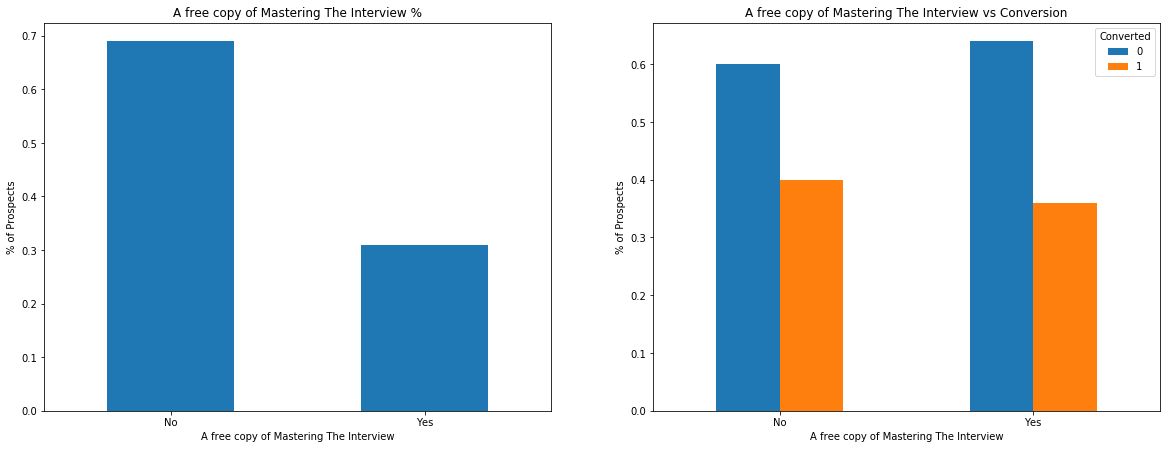

In [57]:
#Ploting the variable w.r.t self and w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['A free copy of Mastering The Interview'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('A free copy of Mastering The Interview %')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['A free copy of Mastering The Interview'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('A free copy of Mastering The Interview vs Conversion')
plt.xlabel('A free copy of Mastering The Interview')
plt.xticks(rotation=0)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

INSIGHT: - Univariate Analysis states that ~68% of the customer said they do not need 'A free copy of Mastering The Interview'. - Bivariate Analysis states that only ~36% of the people who said they need 'A free copy of Mastering The Interview' were converted. All calculations shown above.


### Handling 'Last Notable Activity' column

In [58]:
# Checking unique value counts 

data['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Approached upfront                 1
Email Received                     1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

Merging less frequent values of 'Last Notable Activity' to 'Others' category
Looking at the proportions of various values in 'Last Notable Activity' we could see there are couple of low frequent values in there. We will merge them into a new category 'Others'

In [59]:
# Merging low frequency items to Others
data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                       'Had a Phone Conversation', 'Email Marked Spam', 'Form Submitted on Website',
                                                                       'Resubscribed to emails', 'View in browser link Clicked', 'Approached upfront',
                                                                       'Email Received'], 'Others')

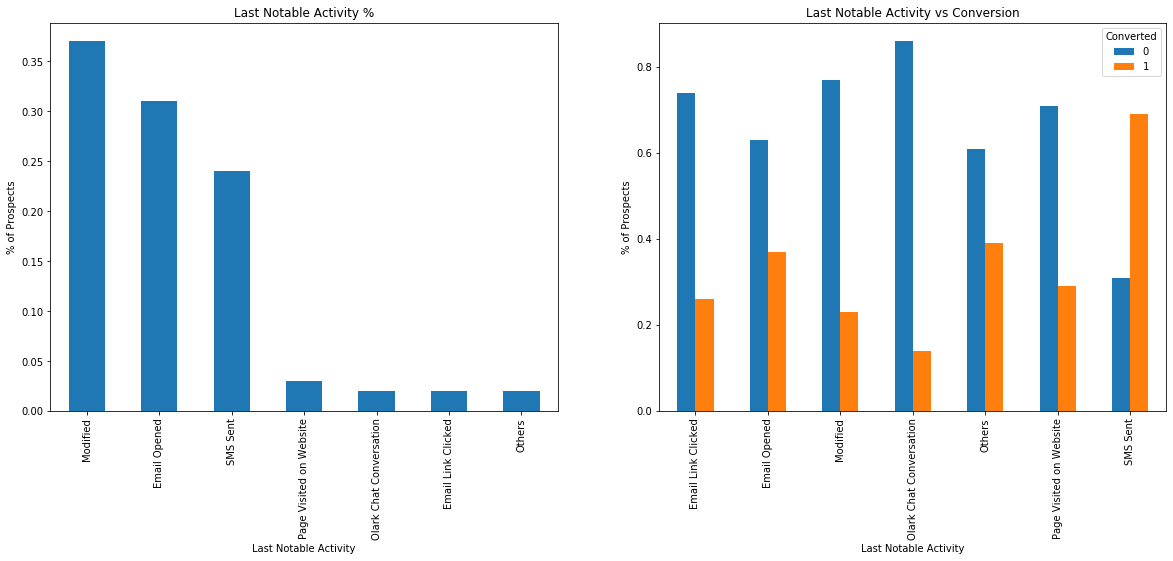

In [60]:
# Plotting w.r.t self as well as w.r.t target variable

plt.figure(figsize=(20, 15))

# Univariate Analysis 
ax= plt.subplot(221)
round(data['Last Notable Activity'].value_counts(normalize=True),2).plot(kind='bar')
plt.title('Last Notable Activity %')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

# Bivariate Analysis

ax=plt.subplot(222)
round(pd.crosstab(data['Last Notable Activity'],data.Converted).apply(lambda r: r/r.sum(),axis=1),2).plot(kind='bar',ax=ax)
plt.title('Last Notable Activity vs Conversion')
plt.xlabel('Last Notable Activity')
plt.xticks(rotation=90)
plt.ylabel('% of Prospects')

plt.subplots_adjust(hspace=.1)
plt.show()

INSIGHT: - Univariate Analysis states that ~37% of the Last Notable Activity is 'Modified' category, followed by ~31% from 'Email Opened' - Bivariate Analysis states that 'Email Opened' has 37% of Conversion and 'Modified' has 23% of Conversion. All calculations shown above.


### Exploring Numerical Variables & Outlier Handling

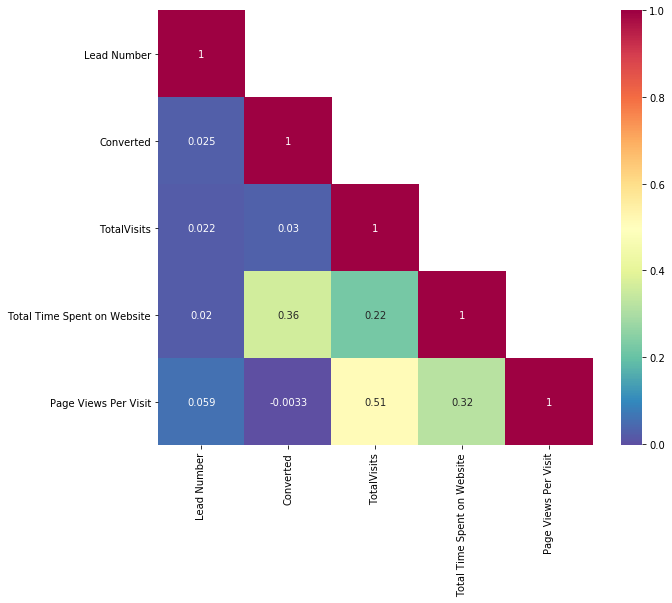

In [61]:
#Checking correlations between numeric variables

cor_mat= data.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="Spectral_r")
plt.show()

INSIGHT: The Heat Map tells us that there is a strong correlation between 'TotalVisits' & 'Page View Per Visit'. We will handle this during our Multi Colinearity check

In [62]:
#Checking overall columns list to analyse

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [63]:
#Checking to drop list, as we donot want to analyse these columns

drop_list

['Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'Do Not Call',
 'Do Not Email',
 'Search',
 'What matters most to you in choosing a course',
 'Country',
 'What is your current occupation',
 'Prospect ID',
 'Lead Number']

In [64]:
# Getting all numerical variables
lead_num = data.select_dtypes(exclude = 'object')
lead_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')

In [65]:
# Removing target variable and 'Lead Number'
lead_num = lead_num.drop('Converted',axis=1)
lead_num = lead_num.drop('Lead Number',axis=1)
lead_num.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

### Outlier Handling Approach
NOTE For outlier handling we have deployed the IQR CAPPING Method. That is we will identify the outlier in each of the numeric variable and impute them with IQR * 1.5. This will help us to remove the Outlier also retain the rows.

In [66]:
Q1 = lead_num.quantile(0.25)
Q1

TotalVisits                     1.0
Total Time Spent on Website    12.0
Page Views Per Visit            1.0
Name: 0.25, dtype: float64

In [67]:
Q3 = lead_num.quantile(0.75)
Q3

TotalVisits                      5.0
Total Time Spent on Website    936.0
Page Views Per Visit             3.0
Name: 0.75, dtype: float64

In [68]:
IQR = Q3 - Q1
print(IQR)

TotalVisits                      4.0
Total Time Spent on Website    924.0
Page Views Per Visit             2.0
dtype: float64


In [69]:
# ANYTHING OVER IQR*1.5 IS CONSIDERED TO BE EXTREMME OUTLIERS
IQR*1.5

TotalVisits                       6.0
Total Time Spent on Website    1386.0
Page Views Per Visit              3.0
dtype: float64

In [70]:
lead_num.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9240.000000,9103.000000
mean,3.445238,487.698268,2.362820
std,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
max,251.000000,2272.000000,55.000000


### Checking for Outliers

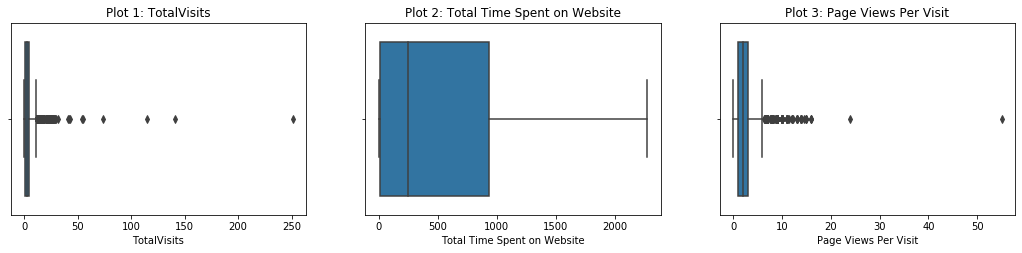

In [71]:
# Checking for outliers in all the numerical columns

plt.figure(figsize=(18,12))

for i in enumerate(lead_num):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data[i[1]])
    plt.title("Plot "+str(i[0]+1)+": "+i[1])
plt.subplots_adjust(wspace=.2,hspace=0.2)
    
plt.show()

NOTE: We could see that TotalVisits and Page Views Per Visits has Outliers. As mentioned in the Outlier handling Approach above, we will impute it using IQR*1.5

###  'TotalVisits' 

In [72]:
# Checking count of unique values

data['TotalVisits'].value_counts(bins=3)

(-0.252, 83.667]     9100
(83.667, 167.333]       2
(167.333, 251.0]        1
Name: TotalVisits, dtype: int64

In [73]:
# Checking statistical summary of TotalVisits

round(data['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        3.45
std         4.85
min         0.00
25%         1.00
50%         3.00
75%         5.00
90%         7.00
99%        17.00
100%      251.00
max       251.00
Name: TotalVisits, dtype: float64

Text(0, 0.5, '% of Users')

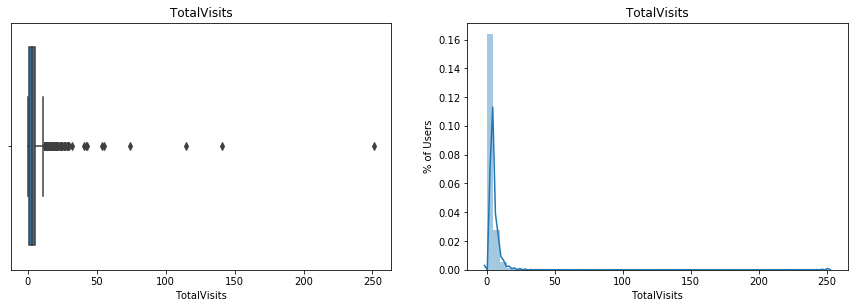

In [74]:
#Plotting before outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(data['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)

plt.subplot(222)
sns.distplot(data['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

In [75]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

data.loc[data['TotalVisits'] > 11, 'TotalVisits'] = 6

Text(0, 0.5, '% of Users')

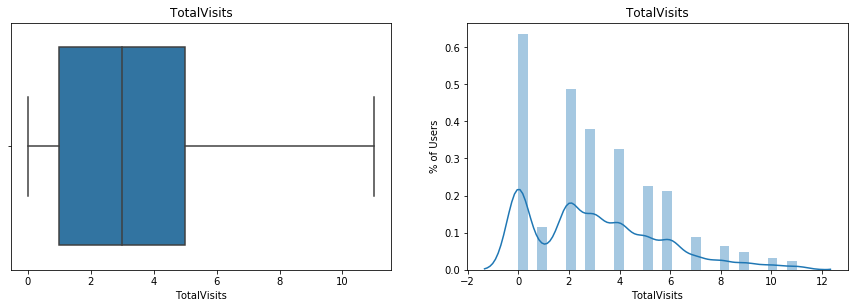

In [76]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(data['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(data['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

###  'Page Views Per Visit' 

In [77]:
# Checking unique value bins

data['Page Views Per Visit'].value_counts(bins=3)

(-0.056, 18.333]    9101
(36.667, 55.0]         1
(18.333, 36.667]       1
Name: Page Views Per Visit, dtype: int64

In [78]:
# Checking values at major percentiles
round(data['Page Views Per Visit'].describe(percentiles=[0.25,0.5,0.75,0.9,0.99,1]),2)

count    9103.00
mean        2.36
std         2.16
min         0.00
25%         1.00
50%         2.00
75%         3.00
90%         5.00
99%         9.00
100%       55.00
max        55.00
Name: Page Views Per Visit, dtype: float64

Text(0, 0.5, '% of Users')

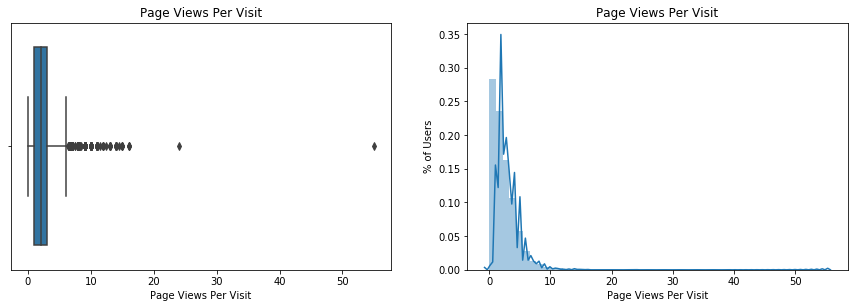

In [79]:
#Plotting before Outlier Handling

plt.figure(figsize=(15, 10))

plt.subplot(221)
sns.boxplot(data['Page Views Per Visit'])
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
 
plt.subplot(222)
sns.distplot(data['Page Views Per Visit'].dropna())
plt.title('Page Views Per Visit')
plt.xlabel('Page Views Per Visit')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

In [80]:
# replacing the outlier  (Q3 + 1.5*IQR) with 1.5*IQR

data.loc[data['Page Views Per Visit'] > 6, 'Page Views Per Visit'] = 3

Text(0, 0.5, '% of Users')

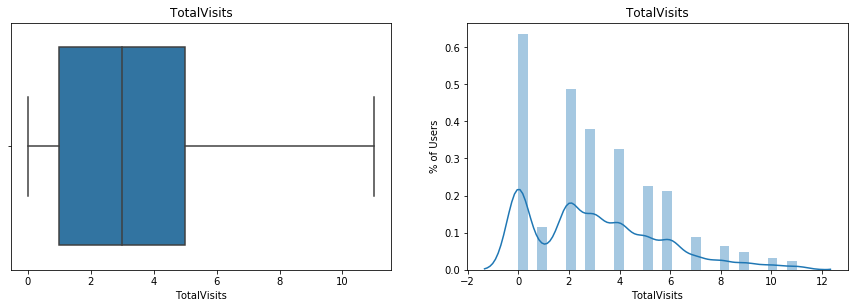

In [81]:
# Plotting after Outlier Handling

plt.figure(figsize=(15, 10))


plt.subplot(221)
sns.boxplot(data['TotalVisits'])
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
 

plt.subplot(222)
sns.distplot(data['TotalVisits'].dropna())
plt.title('TotalVisits')
plt.xlabel('TotalVisits')
plt.xticks(rotation= 0)
plt.ylabel('% of Users')

INSIGHT: All the outliers are treated now

In [82]:
data.shape

(9240, 30)

### Create the final dataframe by excluding the 'to_drop_list' variables

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [84]:
new_data=data[data.columns[~data.columns.isin(drop_list)]]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   City                                    9240 non-null   object 
 10  A free copy of Mastering The Interview  9240 non-null   obje

In [85]:
#Checking shape of new dataframe
new_data.shape

(9240, 12)

### Checking the NULL Values

In [86]:
#checking null values in each columns

new_data.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Converted                                   0
TotalVisits                               137
Total Time Spent on Website                 0
Page Views Per Visit                      137
Last Activity                               0
Specialization                              0
Tags                                        0
City                                        0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [87]:
#checking percentage of null values in each columns

round(100*(new_data.isnull().sum()/len(new_data.index)), 2)

Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             0.00
Specialization                            0.00
Tags                                      0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

### Dropping NULL value rows from the columns 'TotalVisits' & 'Page Views Per Visit'

In [88]:
new_data.shape

(9240, 12)

In [89]:
new_data=new_data.dropna(subset=['Page Views Per Visit','TotalVisits'])
new_data.shape

(9103, 12)

In [90]:
#checking null values in each columns

new_data.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
Tags                                      0
City                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [91]:
# Check the missing values in at row level

missing=new_data.isnull().sum(axis=1)
missing[missing!=0]

Series([], dtype: int64)


### INSIGHT: All the Null Values are removed, and we have our final dataframe. We will use this df for dummy value creation and standardization before building our final Model.

### Checking % of data retained

In [92]:
round((100*new_data.shape[0]/9240),2)

98.52

INSIGHT: Finally we retained ~99% of the data, which is really good.


### Dummy Variable Creation:

In [93]:
#checking for categorical variables with 2 classes. We need to identify them and convert it to integer before applying Dummy

for col in new_data:
    print(new_data[col].value_counts(), '\n')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64 

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                54
Name: Lead Source, dtype: int64 

0    5642
1    3461
Name: Converted, dtype: int64 

0.0     2189
2.0     1680
3.0     1306
4.0     1120
5.0      783
6.0      733
1.0      395
7.0      309
8.0      224
9.0      164
10.0     114
11.0      86
Name: TotalVisits, dtype: int64 

0       2193
60        19
75        18
127       18
74        17
        ... 
1235       1
1091       1
1043       1
1035       1
1891       1
Name: Total Time Spent on Website, Length: 1717, dtype: int64 

0.00    2189
2.00    1795
3.00    1556
4.00     896
1.00     651
        ... 
3.57       1
1.48       1
2.38       1
1.31       1
1.21       1
Name: Page V

In [94]:
# Only 'A free copy of Mastering The Interview' variable has two class

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
new_data[varlist] = new_data[varlist].apply(binary_map)

In [95]:
# Checking count

new_data['A free copy of Mastering The Interview'].value_counts()

0    6215
1    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [96]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   Tags                                    9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

In [97]:
#Converting 'A free copy of Mastering The Interview' to numeric
#new_data['A free copy of Mastering The Interview']=pd.to_numeric(new_data['A free copy of Mastering The Interview'],'coerce',downcast='integer')

In [98]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Converted                               9103 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9103 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9103 non-null   object 
 7   Specialization                          9103 non-null   object 
 8   Tags                                    9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

INSIGHT: All necessary conversions and cleaning are done before we apply our Dummy.

In [99]:
# Creating Dummy, delete the first dummy and dropping the original:

new_data = pd.get_dummies(new_data, drop_first=True)

In [100]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 50 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Converted                                      9103 non-null   int64  
 1   TotalVisits                                    9103 non-null   float64
 2   Total Time Spent on Website                    9103 non-null   int64  
 3   Page Views Per Visit                           9103 non-null   float64
 4   A free copy of Mastering The Interview         9103 non-null   int64  
 5   Lead Origin_Landing Page Submission            9103 non-null   uint8  
 6   Lead Origin_Lead Add Form                      9103 non-null   uint8  
 7   Lead Origin_Lead Import                        9103 non-null   uint8  
 8   Lead Source_Google                             9103 non-null   uint8  
 9   Lead Source_Olark Chat                         9103 

In [101]:
new_data.shape

(9103, 50)

### Test-Train Split

In [102]:
# Putting feature variable to X

X = new_data.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [103]:
# Putting response variable to y
y = new_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [104]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [105]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Looking at Correlations

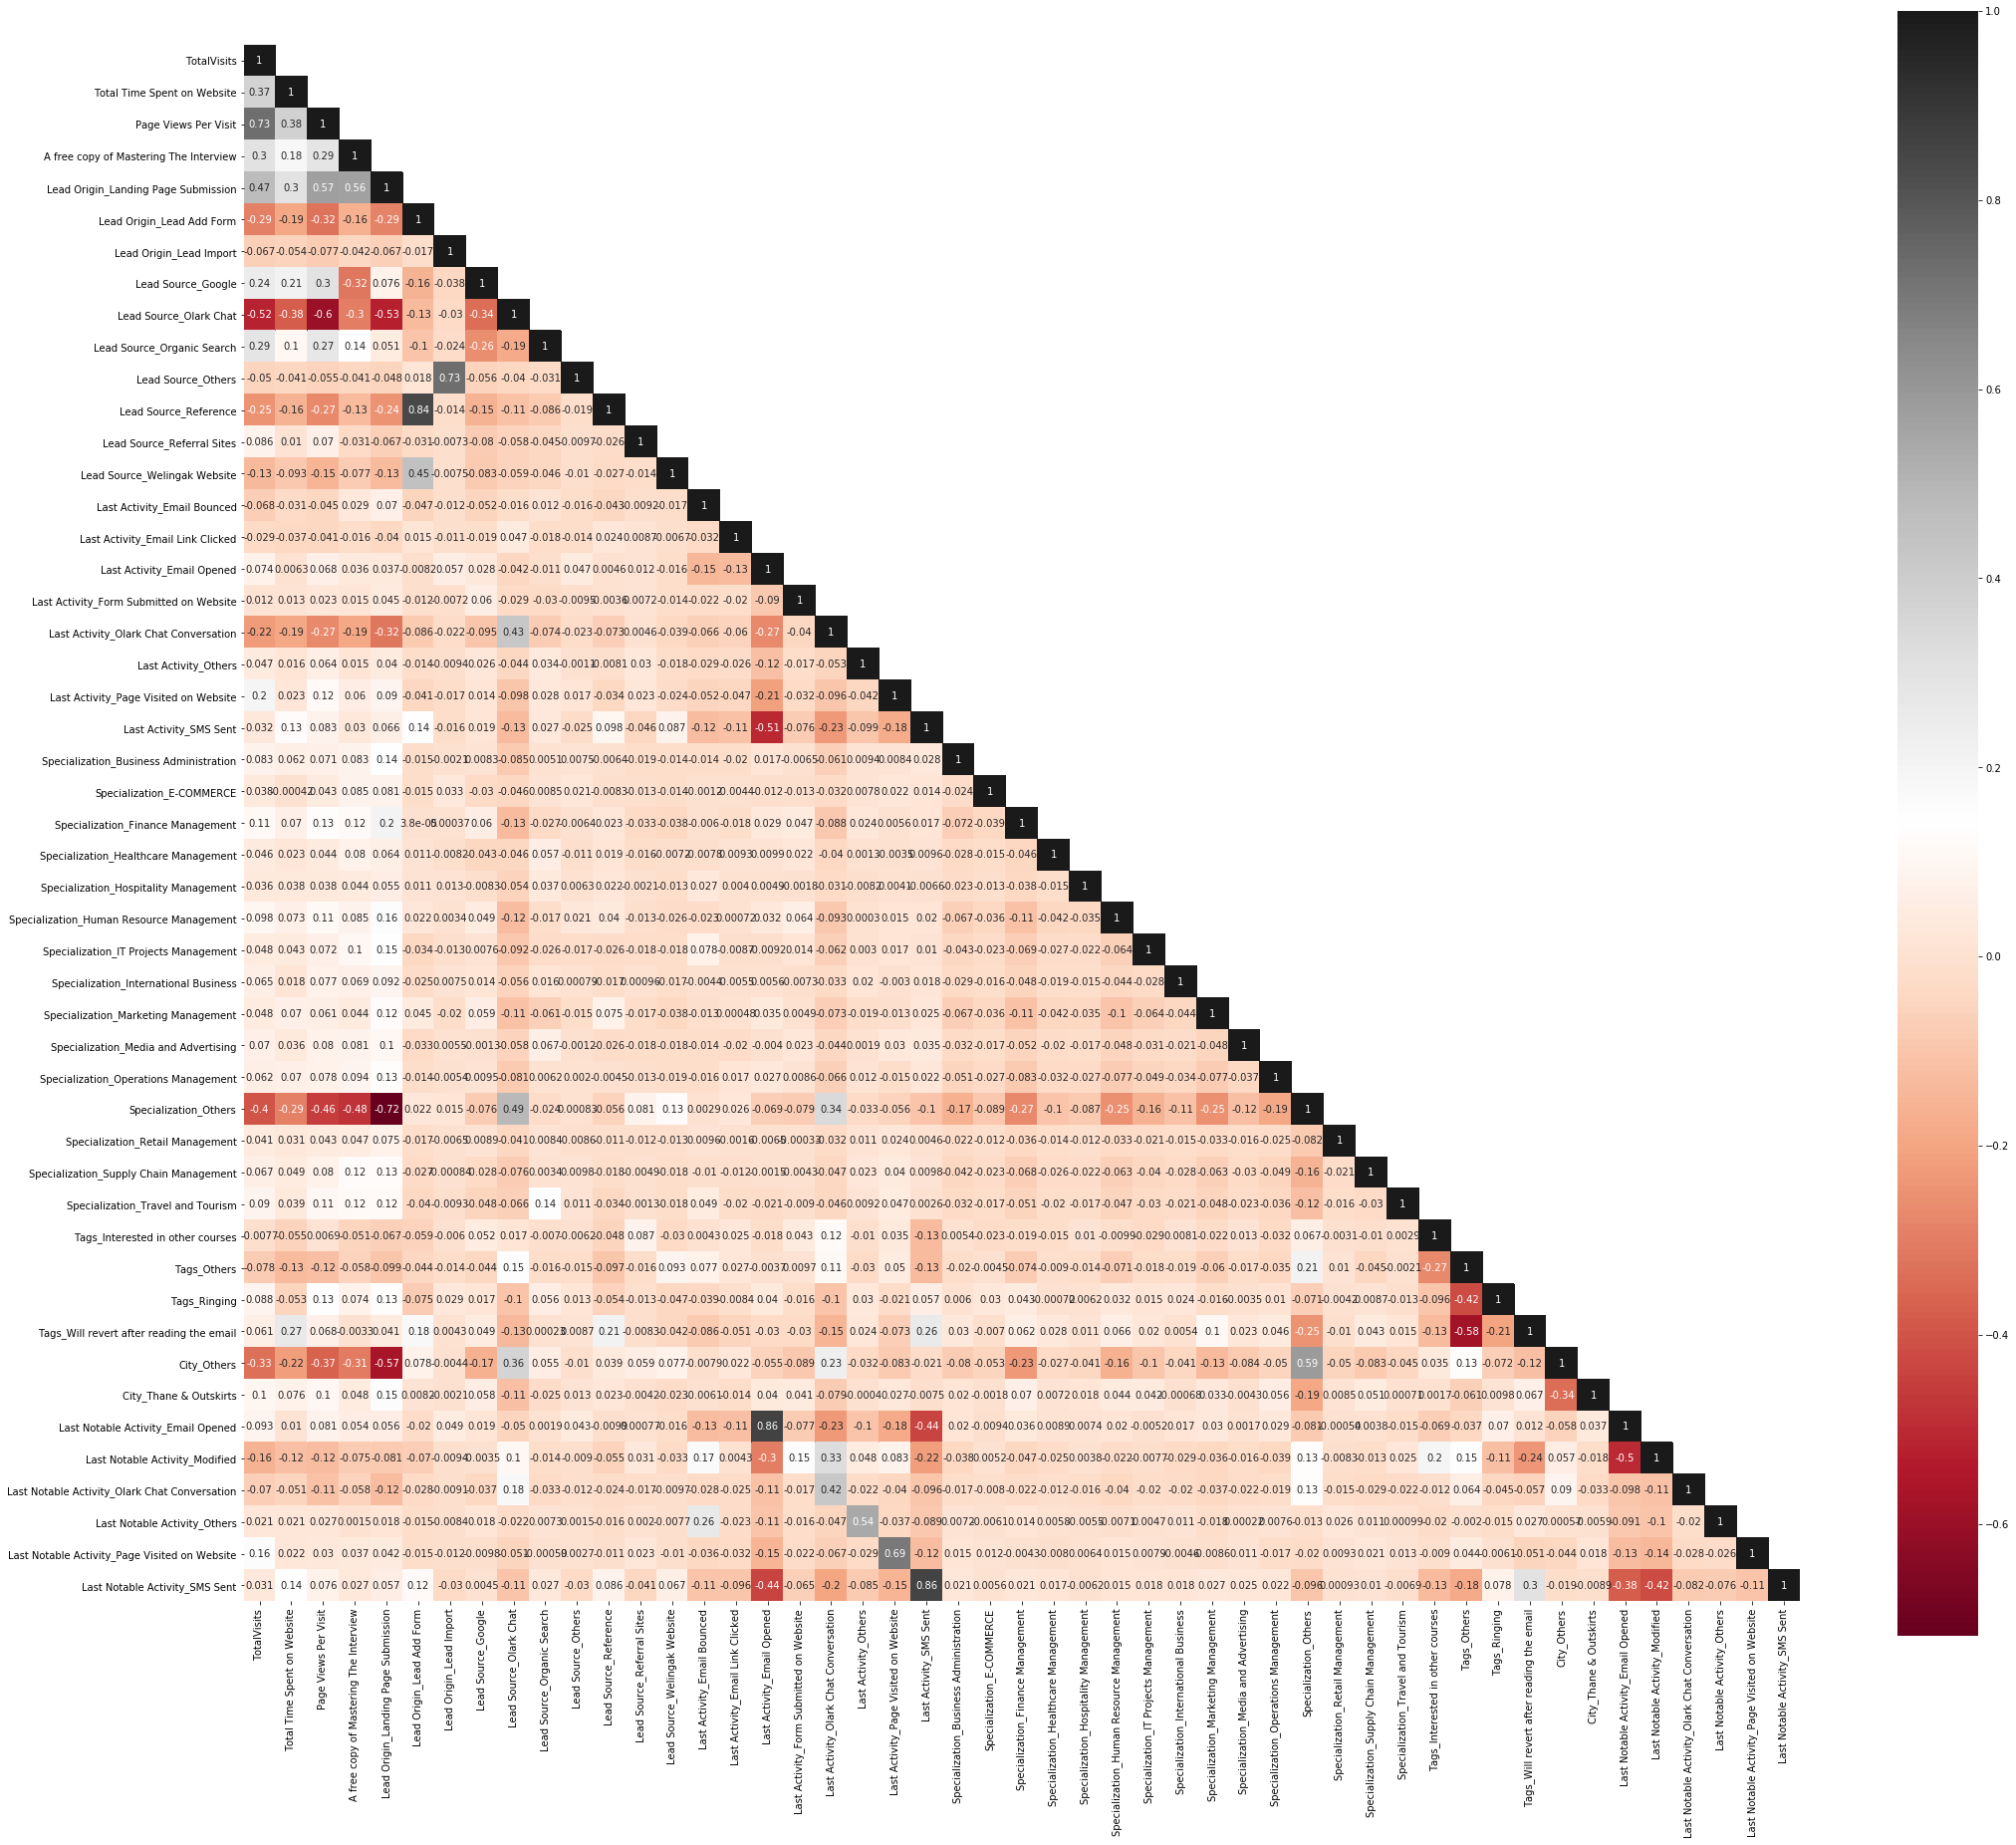

In [106]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

In [107]:
cor_mat

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Tags_Ringing,Tags_Will revert after reading the email,City_Others,City_Thane & Outskirts,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
TotalVisits,1.000000,0.369323,0.729415,0.300948,0.473241,-0.291653,-0.066614,0.242588,-0.521520,0.288563,...,0.088237,0.061108,-0.334887,0.100620,0.092747,-0.159179,-0.069556,0.021165,0.158611,0.030694
Total Time Spent on Website,0.369323,1.000000,0.380196,0.182424,0.297848,-0.189393,-0.054430,0.212368,-0.380481,0.102039,...,-0.052880,0.266901,-0.217473,0.075626,0.010015,-0.119537,-0.050852,0.021368,0.021690,0.135570
Page Views Per Visit,0.729415,0.380196,1.000000,0.287383,0.571017,-0.323177,-0.076994,0.297379,-0.597803,0.272575,...,0.134431,0.067925,-0.368042,0.104074,0.080677,-0.122432,-0.107942,0.026568,0.030179,0.075667
A free copy of Mastering The Interview,0.300948,0.182424,0.287383,1.000000,0.564015,-0.162203,-0.042187,-0.319259,-0.299835,0.143834,...,0.074088,-0.003347,-0.307350,0.047876,0.053943,-0.074528,-0.058270,0.001467,0.036791,0.026999
Lead Origin_Landing Page Submission,0.473241,0.297848,0.571017,0.564015,1.000000,-0.286614,-0.066735,0.076480,-0.526359,0.050831,...,0.130290,0.040752,-0.568112,0.154951,0.056186,-0.081372,-0.122803,0.018278,0.041917,0.056536
Lead Origin_Lead Add Form,-0.291653,-0.189393,-0.323177,-0.162203,-0.286614,1.000000,-0.016578,-0.160272,-0.127962,-0.101783,...,-0.074624,0.179077,0.077852,0.008211,-0.020356,-0.069595,-0.027558,-0.015376,-0.014670,0.118734
Lead Origin_Lead Import,-0.066614,-0.054430,-0.076994,-0.042187,-0.066735,-0.016578,1.000000,-0.037790,-0.030444,-0.023699,...,0.029100,0.004285,-0.004359,-0.002066,0.049497,-0.009436,-0.009102,-0.008409,-0.011811,-0.029694
Lead Source_Google,0.242588,0.212368,0.297379,-0.319259,0.076480,-0.160272,-0.037790,1.000000,-0.335597,-0.261244,...,0.017160,0.049183,-0.165006,0.058368,0.019147,-0.003465,-0.036661,0.018116,-0.009789,0.004510
Lead Source_Olark Chat,-0.521520,-0.380481,-0.597803,-0.299835,-0.526359,-0.127962,-0.030444,-0.335597,1.000000,-0.186922,...,-0.101279,-0.134880,0.364143,-0.114301,-0.049751,0.103220,0.175378,-0.021873,-0.051486,-0.105882
Lead Source_Organic Search,0.288563,0.102039,0.272575,0.143834,0.050831,-0.101783,-0.023699,-0.261244,-0.186922,1.000000,...,0.056443,0.000233,0.055263,-0.024918,0.001940,-0.014329,-0.032880,0.007321,-0.000594,0.027251


INSIGHT: There seems to be few highly correlated variables. We will remove all highly correlated variables above 0.4 'r value'


### Dropping highly correlated dummy variables

In [108]:
X_test = X_test.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

X_train = X_train.drop(['Page Views Per Visit', 'Lead Origin_Landing Page Submission', 
                      'Lead Source_Olark Chat', 'Specialization_Others', 'City_Others', 
                      'Lead Source_Reference', 'Lead Source_Welingak Website', 'Lead Source_Others', 
                      'Last Activity_Olark Chat Conversation', 'Last Notable Activity_Email Opened',
                      'Last Notable Activity_SMS Sent', 'Last Activity_SMS Sent', 
                      'Last Notable Activity_Olark Chat Conversation', 'Last Notable Activity_Others', 
                      'Last Notable Activity_Page Visited on Website', 'Tags_Others'], 1)

In [109]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               1821 non-null   float64
 1   Total Time Spent on Website               1821 non-null   int64  
 2   A free copy of Mastering The Interview    1821 non-null   int64  
 3   Lead Origin_Lead Add Form                 1821 non-null   uint8  
 4   Lead Origin_Lead Import                   1821 non-null   uint8  
 5   Lead Source_Google                        1821 non-null   uint8  
 6   Lead Source_Organic Search                1821 non-null   uint8  
 7   Lead Source_Referral Sites                1821 non-null   uint8  
 8   Last Activity_Email Bounced               1821 non-null   uint8  
 9   Last Activity_Email Link Clicked          1821 non-null   uint8  
 10  Last Activity_Email Opened       

Checking the Correlation Matrix


After dropping highly correlated variables now let's check the correlation matrix again.

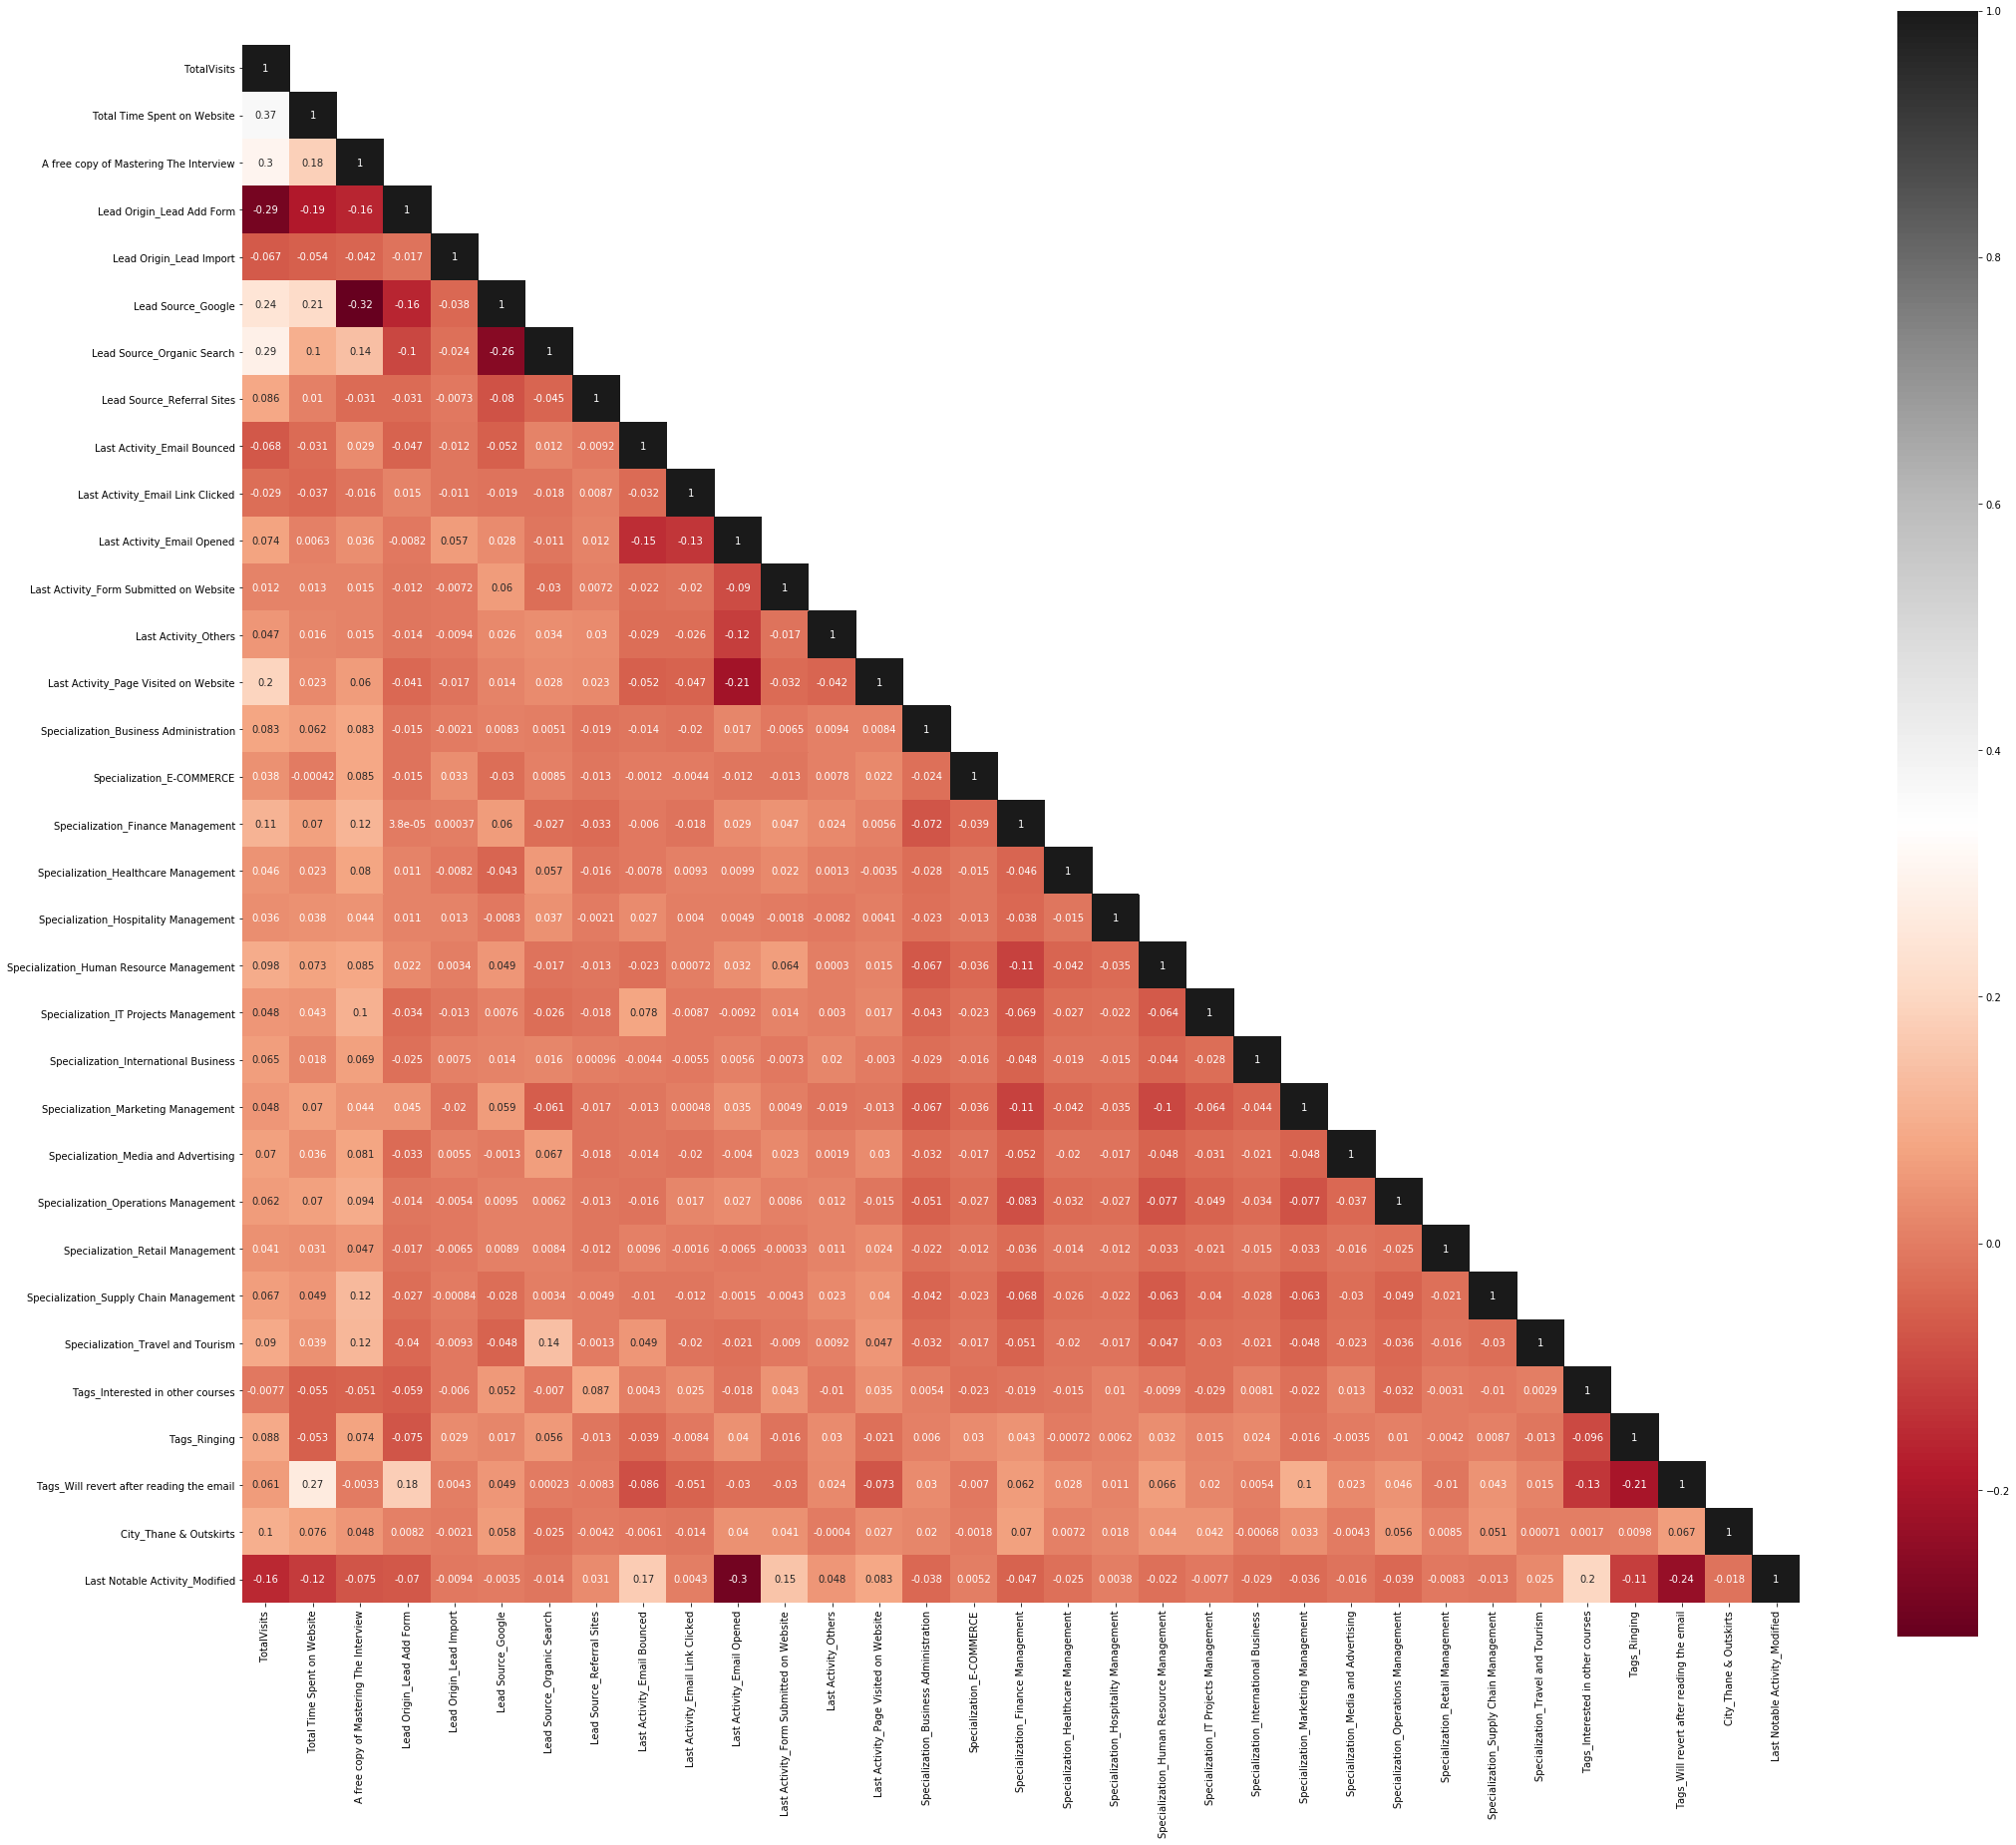

In [110]:
cor_mat= X_train.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(35,30)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="RdGy")
plt.show()

### Feature Scaling

In [111]:
X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,2.0,60,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6902,1.0,495,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7593,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,9.0,413,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4137,6.0,1049,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
# Selecting the variables that needs to be scaled

var_to_scale=['TotalVisits','Total Time Spent on Website']

In [113]:
scaler = StandardScaler()

X_train[var_to_scale] = scaler.fit_transform(X_train[var_to_scale])

X_train.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
9000,-0.414618,-0.771069,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6902,-0.798210,0.026359,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7593,-1.181802,-0.881059,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1498,2.270525,-0.123961,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4137,1.119749,1.041934,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building

### Model 1 (Train)

In [114]:
import statsmodels.api as sm


In [115]:
# Logistic regression model

X_train_sm = sm.add_constant(X_train)
logm1 = sm.Logit(y_train, X_train_sm)
logm1_model = logm1.fit()
logm1_model.summary()

Optimization terminated successfully.
         Current function value: 0.295196
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7248
Method:                           MLE   Df Model:                           33
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.5551
Time:                        19:54:54   Log-Likelihood:                -2149.6
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.1302      0.101     -1.295      0.195      -0.327       0.067
TotalVisits                                  0.0910      0.051      1.790      0.073      -0.009       0.191
Total Time Spent on Website                  1.0044      0.044     22.920      0.000       0.919       1.090
A free copy of Mastering The Interview      -0.3427      0.113     -3.034      0.002      -0.564      -0.121
Lead Origin_Lead Add Form                    4.4064      0.232     18.979      0.000       3.951       4.861
Lead Origin_Lead Import                      0.5848      0.667      0.877      0.380      -0.722       1.891
Lead Source_Google                          -0.2486      0.107     -2.317      0.020      -0.459      -0.038
Lead Source_Organic Search                  -0.1860      0.134     -1.388      0.165      -0.448       0.077
Lead Source_Referral Sites                  -0.7159      0.398     -1.797      0.072      -1.497       0.065
Last Activity_Email Bounced                 -2.0547      0.342     -6.015      0.000      -2.724      -1.385
Last Activity_Email Link Clicked            -0.7962      0.233     -3.416      0.001      -1.253      -0.339
Last Activity_Email Opened                  -0.6611      0.090     -7.373      0.000      -0.837      -0.485
Last Activity_Form Submitted on Website     -0.2825      0.354     -0.798      0.425      -0.976       0.411
Last Activity_Others                        -0.3350      0.288     -1.163      0.245      -0.900       0.230
Last Activity_Page Visited on Website       -0.9925      0.166     -5.986      0.000      -1.317      -0.668
Specialization_Business Administration      -0.1696      0.208     -0.817      0.414      -0.576       0.237
Specialization_E-COMMERCE                    0.1609      0.351      0.458      0.647      -0.527       0.849
Specialization_Finance Management           -0.1102      0.152     -0.728      0.467      -0.407       0.187
Specialization_Healthcare Management        -0.4927      0.332     -1.483      0.138      -1.144       0.158
Specialization_Hospitality Management       -0.4014      0.365     -1.100      0.271      -1.117       0.314
Specialization_Human Resource Management    -0.1059      0.160     -0.663      0.507      -0.419       0.207
Specialization_IT Projects Management       -0.0771      0.228     -0.338      0.735      -0.524       0.370
Specialization_International Business       -0.4556      0.303     -1.504      0.132      -1.049       0.138
Specialization_Marketing Management          0.0463      0.153      0.302      0.763      -0.254       0.347
Specialization_Media and Advertising        -0.1269      0.280     -0.454      0.650      -0.675       0.421
Specialization_Operations Management         0.0271      0.186      0.146      0.884      -0.338       0.392
Specialization_Retail Management            -0.2207      0.353     -0.624      0

### Feature Selection Using RFE

In [116]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [117]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [118]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
        True,  True, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False,  True])

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 9),
 ('Lead Source_Organic Search', False, 12),
 ('Lead Source_Referral Sites', False, 2),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 6),
 ('Last Activity_Others', False, 5),
 ('Last Activity_Page Visited on Website', True, 1),
 ('Specialization_Business Administration', False, 13),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_Finance Management', False, 15),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 4),
 ('Specialization_Human Resource Management', False, 16),
 ('Specialization_IT Projects Management', False, 21),
 ('Specialization_Intern

In [120]:
col = X_train.columns[rfe.support_]

In [121]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [122]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Form Submitted on Website',
       'Last Activity_Others', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management', 'City_Thane & Outskirts'],
      dtype='object')

### Model 2 (Train)

In [123]:
X_train_sm = sm.add_constant(X_train[col])

logm2 = sm.Logit(y_train, X_train_sm)
logm2_model = logm2.fit()
logm2_model.summary()

Optimization terminated successfully.
         Current function value: 0.297039
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7268
Method:                           MLE   Df Model:                           13
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.5523
Time:                        19:54:56   Log-Likelihood:                -2163.0
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4094      0.070     -5.811      0.000      -0.547      -0.271
Total Time Spent on Website                  0.9584      0.040     24.257      0.000       0.881       1.036
Lead Origin_Lead Add Form                    4.4693      0.225     19.832      0.000       4.028       4.911
Lead Origin_Lead Import                      0.6605      0.668      0.989      0.323      -0.649       1.970
Last Activity_Email Bounced                 -2.0270      0.338     -5.992      0.000      -2.690      -1.364
Last Activity_Email Link Clicked            -0.7741      0.233     -3.326      0.001      -1.230      -0.318
Last Activity_Email Opened                  -0.6606      0.088     -7.545      0.000      -0.832      -0.489
Last Activity_Page Visited on Website       -0.9524      0.159     -5.973      0.000      -1.265      -0.640
Specialization_Healthcare Management        -0.5086      0.317     -1.603      0.109      -1.131       0.113
Specialization_Travel and Tourism           -0.8422      0.299     -2.814      0.005      -1.429      -0.256
Tags_Interested in other courses            -2.4483      0.329     -7.437      0.000      -3.094      -1.803
Tags_Ringing                                -3.3693      0.233    -14.446      0.000      -3.826      -2.912
Tags_Will revert after reading the email     4.1460      0.158     26.306      0.000       3.837       4.455
Last Notable Activity_Modified              -1.1220      0.089    -12.610      0.000      -1.296      -0.948
============================================================================================================
"""

In [124]:
X_train[col]

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Page Visited on Website,Specialization_Healthcare Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
9000,-0.771069,0,0,0,0,0,0,0,0,0,0,0,1
6902,0.026359,0,0,1,0,0,0,0,0,0,0,0,0
7593,-0.881059,0,0,0,0,1,0,0,0,0,0,0,0
1498,-0.123961,0,0,0,0,1,0,0,0,0,0,0,0
4137,1.041934,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.601974,0,0,0,0,0,1,0,0,0,0,0,1
82,-0.881059,0,0,0,1,0,0,0,0,0,0,1,0
8173,1.445231,0,0,1,0,0,0,0,0,0,0,0,1
7055,-0.754571,0,0,0,0,0,0,0,0,0,0,1,0


### Checking VIFs

In [125]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.30
11,Tags_Will revert after reading the email,1.29
5,Last Activity_Email Opened,1.22
1,Lead Origin_Lead Add Form,1.18
0,Total Time Spent on Website,1.16
9,Tags_Interested in other courses,1.12
10,Tags_Ringing,1.10
3,Last Activity_Email Bounced,1.08
6,Last Activity_Page Visited on Website,1.07
8,Specialization_Travel and Tourism,1.03


INSIGHT: We will remove 'Specialization_Healthcare Management' as this variable has an 'Insiginificant P Value'

In [127]:
col1=col.drop('Specialization_Healthcare Management')

In [128]:
col1=['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
      'Lead Origin_Lead Import', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
      'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
      'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']

In [129]:
col1

['Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Last Activity_Email Bounced',
 'Last Activity_Email Link Clicked',
 'Last Activity_Email Opened',
 'Last Activity_Page Visited on Website',
 'Specialization_Travel and Tourism',
 'Tags_Interested in other courses',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Last Notable Activity_Modified']

### Model 3 (Train)

Build our third model after removing the variable with Insignificant P Value

In [130]:
X_train_sm = sm.add_constant(X_train[col1])

logm6 = sm.Logit(y_train, X_train_sm)
logm6_model = logm6.fit()
logm6_model.summary()

Optimization terminated successfully.
         Current function value: 0.297221
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7282
Model:                          Logit   Df Residuals:                     7269
Method:                           MLE   Df Model:                           12
Date:                Mon, 30 Nov 2020   Pseudo R-squ.:                  0.5520
Time:                        19:54:56   Log-Likelihood:                -2164.4
converged:                       True   LL-Null:                       -4831.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.4200      0.070     -5.990      0.000      -0.557      -0.283
Total Time Spent on Website                  0.9565      0.039     24.232      0.000       0.879       1.034
Lead Origin_Lead Add Form                    4.4676      0.225     19.820      0.000       4.026       4.909
Lead Origin_Lead Import                      0.6675      0.668      1.000      0.317      -0.641       1.976
Last Activity_Email Bounced                 -2.0249      0.338     -5.993      0.000      -2.687      -1.363
Last Activity_Email Link Clicked            -0.7762      0.233     -3.335      0.001      -1.232      -0.320
Last Activity_Email Opened                  -0.6594      0.088     -7.535      0.000      -0.831      -0.488
Last Activity_Page Visited on Website       -0.9497      0.159     -5.967      0.000      -1.262      -0.638
Specialization_Travel and Tourism           -0.8326      0.299     -2.785      0.005      -1.419      -0.247
Tags_Interested in other courses            -2.4421      0.329     -7.422      0.000      -3.087      -1.797
Tags_Ringing                                -3.3633      0.233    -14.431      0.000      -3.820      -2.906
Tags_Will revert after reading the email     4.1410      0.158     26.288      0.000       3.832       4.450
Last Notable Activity_Modified              -1.1159      0.089    -12.563      0.000      -1.290      -0.942
============================================================================================================
"""

### Checking VIFs

In [131]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,1.30
10,Tags_Will revert after reading the email,1.29
5,Last Activity_Email Opened,1.21
1,Lead Origin_Lead Add Form,1.17
0,Total Time Spent on Website,1.16
8,Tags_Interested in other courses,1.12
9,Tags_Ringing,1.10
3,Last Activity_Email Bounced,1.08
6,Last Activity_Page Visited on Website,1.07
7,Specialization_Travel and Tourism,1.03


 INSIGHT: No Multicollinearity in our variables and there are no insignificant p-values.

### Predicted Probability Calculation

In [132]:
# Getting the predicted values on the train set
y_train_pred = logm6_model.predict(X_train_sm)

In [133]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09334398, 0.08168847, 0.12762359, 0.23184107, 0.98301538,
       0.99532684, 0.00503939, 0.95687876, 0.78795857, 0.41613539])

### Creating a dataframe with the actual Converted flag and the Predicted probabilities

In [134]:
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.093344,9000
1,0,0.081688,6902
2,0,0.127624,7593
3,0,0.231841,1498
4,1,0.983015,4137


### Creating new column 'Predicted' with 1 if Converted_Prob > 0.5 else 0

In [135]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted
0,0,0.093344,9000,0
1,0,0.081688,6902,0
2,0,0.127624,7593,0
3,0,0.231841,1498,0
4,1,0.983015,4137,1


### Creating a Confusion Matrix

In [136]:
from sklearn import metrics

In [137]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Greens",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

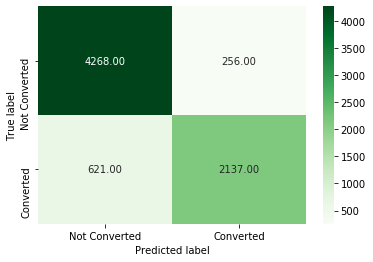

In [138]:
#Invoking the function

draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted)

In [139]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted )
confusion

array([[4268,  256],
       [ 621, 2137]], dtype=int64)

### Measuring Accuracies

In [140]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.Predicted))

0.8795660532820654


In [141]:
print( metrics.classification_report( y_train_pred_final.Converted_IND, y_train_pred_final.Predicted ) )

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      4524
           1       0.89      0.77      0.83      2758

    accuracy                           0.88      7282
   macro avg       0.88      0.86      0.87      7282
weighted avg       0.88      0.88      0.88      7282



### Metrics beyond simply accuracy

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7748368382886149

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.9434129089301503

In [145]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.05658709106984969


In [146]:
# positive predictive value (precesion)
print (TP / float(TP+FP))

0.893021312160468


In [147]:
# Negative predictive value 
print (TN / float(TN+ FN))

0.8729801595418286


### Precision and Recall trade-off

For our Business Problem, The appropriate Metrics to be use will be Recall and Precision.

Because this will help us to identify the predicted CONVERTED is actual CONVERTED and
Probability that an actual CONVERTED case is predicted correctly.
So we will use the Precision-Recall trade off curve to identify the most optimised threshold.

In [148]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted_IND, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    1
 7280    1
 7281    0
 Name: Converted_IND, Length: 7282, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7277    0
 7278    1
 7279    0
 7280    1
 7281    0
 Name: Predicted, Length: 7282, dtype: int64)

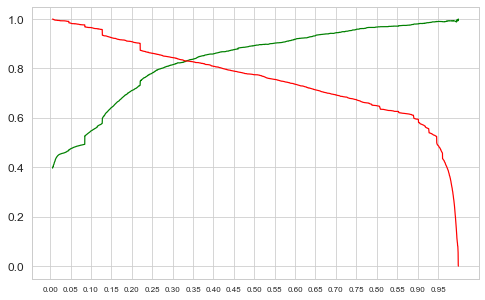

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted_IND, y_train_pred_final.Converted_Prob)
# Plotting the precision recall curve

plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)

plt.show()

INSIGHT: The Precission & Recall Trade Off seems to be 0.34 We will use this as threshold for Test data.


### From the curve above, 0.34 is the optimum point to take it as a threshold.

In [150]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.34 else 0)

y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,Predicted,final_predicted
0,0,0.093344,9000,0,0
1,0,0.081688,6902,0,0
2,0,0.127624,7593,0,0
3,0,0.231841,1498,0,0
4,1,0.983015,4137,1,1


In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

0.8728371326558638

In [152]:
confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted )
confusion3

array([[4069,  455],
       [ 471, 2287]], dtype=int64)

In [153]:
def draw_cm( actual, predicted ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="Purples",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

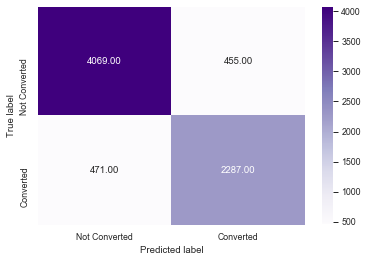

In [154]:
#Invoking the function
draw_cm( y_train_pred_final.Converted_IND, y_train_pred_final.final_predicted)

In [155]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [156]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8292240754169689

In [157]:
# Let us calculate specificity
TN / float(TN+FP)

0.8994252873563219

In [158]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10057471264367816


In [159]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8340627279358133


In [160]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8962555066079295


### Precision and Recall
Precision
TP / TP + FP

In [161]:
confusion3[1,1]/(confusion3[0,1]+confusion3[1,1])

0.8340627279358133

Recall

TP / TP + FN

In [162]:
confusion3[1,1]/(confusion3[1,0]+confusion3[1,1])

0.8292240754169689

### Making predictions on the test set

In [163]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1821 entries, 3504 to 8487
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               1821 non-null   float64
 1   Total Time Spent on Website               1821 non-null   int64  
 2   A free copy of Mastering The Interview    1821 non-null   int64  
 3   Lead Origin_Lead Add Form                 1821 non-null   uint8  
 4   Lead Origin_Lead Import                   1821 non-null   uint8  
 5   Lead Source_Google                        1821 non-null   uint8  
 6   Lead Source_Organic Search                1821 non-null   uint8  
 7   Lead Source_Referral Sites                1821 non-null   uint8  
 8   Last Activity_Email Bounced               1821 non-null   uint8  
 9   Last Activity_Email Link Clicked          1821 non-null   uint8  
 10  Last Activity_Email Opened       

In [164]:
X_test.head()

,TotalVisits,Total Time Spent on Website,A free copy of Mastering The Interview,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,City_Thane & Outskirts,Last Notable Activity_Modified
3504,3.0,424,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4050,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
7201,2.0,712,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1196,4.0,423,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8219,7.0,247,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
# Scaling the Test Set

X_test[var_to_scale] = scaler.transform(X_test[var_to_scale])

In [166]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Page Visited on Website,Specialization_Healthcare Management,Specialization_Travel and Tourism,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
3504,-0.103796,0,0,0,0,1,0,0,0,0,1,0,0
4050,-0.881059,1,0,0,0,0,0,0,0,0,0,1,0
7201,0.424156,0,0,0,0,0,0,1,0,0,0,0,0
1196,-0.105629,0,0,0,0,1,0,0,1,0,1,0,0
8219,-0.428267,0,0,0,0,0,1,0,0,0,0,0,0


In [167]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Healthcare Management',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [168]:
# Removing 'Lead Origin_Lead Import', 'Lead Source_Referral Sites',
#          'Specialization_Healthcare Management' & 'Specialization_International Business'

# this columns were remived during train model building exercise

X_test_sm=X_test_sm[['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Page Visited on Website',
       'Specialization_Travel and Tourism', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified']]

### Making predictions

In [169]:
# Predicting the final test model 
y_test_pred = logm6_model.predict(X_test_sm)

In [170]:
y_test_pred[:10]

3504    0.010540
4050    0.999355
7201    0.496434
1196    0.004603
8219    0.144381
8747    0.127624
9048    0.753695
6524    0.111344
7693    0.267963
8187    0.460464
dtype: float64

In [171]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

,0
3504,0.010540
4050,0.999355
7201,0.496434
1196,0.004603
8219,0.144381


In [172]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3504,0
4050,1
7201,0
1196,0
8219,1


In [173]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,0,3504,0.010540
1,1,4050,0.999355
2,0,7201,0.496434
3,0,1196,0.004603
4,1,8219,0.144381


In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)

### Let's see the head of y_pred_final

In [175]:
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,3504,0,0.010540
1,4050,1,0.999355
2,7201,0,0.496434
3,1196,0,0.004603
4,8219,1,0.144381


NOTE: We use the Threshold .34 we got it from Precission & Recall Tradeoff step

In [176]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,3504,0,0.010540,0
1,4050,1,0.999355,1
2,7201,0,0.496434,1
3,1196,0,0.004603,0
4,8219,1,0.144381,0


### Overall Accuracy of the Model

In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted_IND, y_pred_final.final_predicted)

0.8780889621087314

### Confusion Matrix (Test Predict)

In [178]:
confusion_final = metrics.confusion_matrix(y_pred_final.Converted_IND, y_pred_final.final_predicted )
confusion_final

array([[1011,  107],
       [ 115,  588]], dtype=int64)

In [179]:
def draw_cm( actual, predicted ): 
    ## Cret
    cm = metrics.confusion_matrix( actual, predicted, [0,1] ) 
    sns.heatmap(cm, annot=True, fmt='.2f', cmap="terrain",
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
    plt.show()

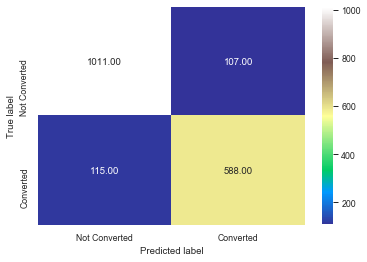

In [180]:
#Invoking the function
draw_cm( y_pred_final.Converted_IND, y_pred_final.final_predicted )

In [181]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

### Sensitivity

In [182]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8364153627311522

### Specificity

In [183]:
# Let us calculate specificity
TN / float(TN+FP)

0.9042933810375671

In [184]:
y_test=y_pred_final["Converted_IND"]
y_test

0       0
1       1
2       0
3       0
4       1
       ..
1816    1
1817    1
1818    1
1819    1
1820    0
Name: Converted_IND, Length: 1821, dtype: int64

### Precision and Recall

Precision

TP / TP + FP

In [185]:
confusion_final[1,1]/(confusion_final[0,1]+confusion_final[1,1])

0.8460431654676259

### Recall
TP / TP + FN

In [186]:
confusion_final[1,1]/(confusion_final[1,0]+confusion_final[1,1])

0.8364153627311522

### ROC curve (Area Under Curve)

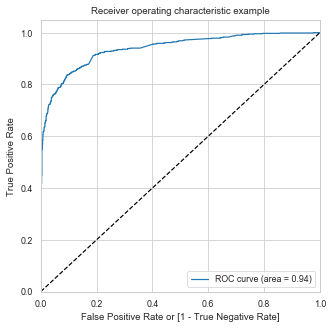

In [187]:

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                             drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.Converted_IND,
                                         y_pred_final.Converted_Prob, drop_intermediate=False)
# Invoking the function to draw ROC curve

draw_roc( y_pred_final.Converted_IND, y_pred_final.Converted_Prob)

## Lead Scoring

In [188]:
y_pred_final

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,3504,0,0.010540,0
1,4050,1,0.999355,1
2,7201,0,0.496434,1
3,1196,0,0.004603,0
4,8219,1,0.144381,0
...,...,...,...,...
1816,643,1,0.040899,0
1817,7424,1,0.968435,1
1818,1529,1,0.604029,1
1819,7525,1,0.999355,1


In [189]:
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='lead_score',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
910,4297,1,0.994989,1,99
1398,8597,1,0.994683,1,99
161,2852,1,0.991520,1,99
1671,2926,1,0.996048,1,99
1463,4532,1,0.993876,1,99
...,...,...,...,...,...
857,4350,0,0.007736,0,0
1026,5564,0,0.001858,0,0
1047,2637,0,0.004614,0,0
271,2000,0,0.001291,0,0


## Top Features/Predictors

In [190]:
# Getting the parameters from final Model (Model 3)

pd.options.display.float_format = '{:.2f}'.format
final_parameters = logm6_model.params[1:]
final_parameters

Total Time Spent on Website                 0.96
Lead Origin_Lead Add Form                   4.47
Lead Origin_Lead Import                     0.67
Last Activity_Email Bounced                -2.02
Last Activity_Email Link Clicked           -0.78
Last Activity_Email Opened                 -0.66
Last Activity_Page Visited on Website      -0.95
Specialization_Travel and Tourism          -0.83
Tags_Interested in other courses           -2.44
Tags_Ringing                               -3.36
Tags_Will revert after reading the email    4.14
Last Notable Activity_Modified             -1.12
dtype: float64

In [191]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Total Time Spent on Website                 21.41
Lead Origin_Lead Add Form                  100.00
Lead Origin_Lead Import                     14.94
Last Activity_Email Bounced                -45.32
Last Activity_Email Link Clicked           -17.37
Last Activity_Email Opened                 -14.76
Last Activity_Page Visited on Website      -21.26
Specialization_Travel and Tourism          -18.64
Tags_Interested in other courses           -54.66
Tags_Ringing                               -75.28
Tags_Will revert after reading the email    92.69
Last Notable Activity_Modified             -24.98
dtype: float64

In [192]:
# Sorting the Predictor variables based on their relative coefficient values

top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
top_predictors_sort

Total Time Spent on Website                  9
Lead Origin_Lead Add Form                    8
Lead Origin_Lead Import                      3
Last Activity_Email Bounced                 11
Last Activity_Email Link Clicked             6
Last Activity_Email Opened                   7
Last Activity_Page Visited on Website        4
Specialization_Travel and Tourism            5
Tags_Interested in other courses             2
Tags_Ringing                                 0
Tags_Will revert after reading the email    10
Last Notable Activity_Modified               1
dtype: int64

<Figure size 864x576 with 0 Axes>

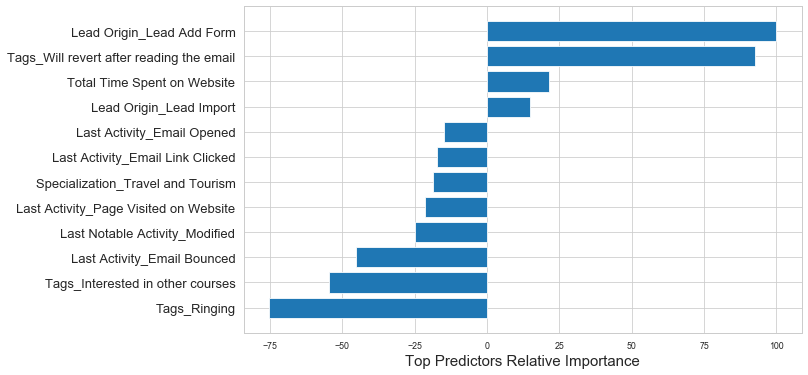

In [193]:
# Plotting the predictors based on their relative importance

%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col1].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

## Conclusion

#### ~84% of Recall value indicates that our model is able to predict 84% of actual conversion cases correctly


#### ~85% of Precision value indicates that 85% of the conversions that our model predicted is actually converted.

## TOP 3 Variables:
    - Lead Add Form
    -Will revert afater reading the email
    -Total time spent on website

#### Basically X education have to focus on the "Top 3 Variables" because it gives the most number of positively converted leads

### BOTTOM 3 VARIABLES:
     - Ringing
     -Interested in other courses
     -Email bounced

#### So, from the above we can infer that the X Education group should not focus on the Bottom 3 variables. Putting efforts on them will lead to nothing other than waste of time and resources